In [5]:
%pip install "protobuf<4,>=3.20"
%pip install "huggingface_hub<0.15,>=0.13"
%pip install "matplotlib>=3.7.0,<3.9.0"
%pip install --upgrade "numpy>=1.23,<1.27"

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pytorch-lightning 1.5.9 has a non-standard dependency specifier torch>=1.7.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pytorch-lightning 1.5.9 has a non-standard dependency specifier torch>=1.7.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pytorch-lightning 1.5.9 has a non-standard dependency specifier torch>=1.7.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 61.0/61.0 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   - -------------------------------------- 0.7/15.8 MB 23.1 MB/s eta 0:00:01
   --- ------------------------------------ 1.6/15.8 MB 20.1 MB/s eta 0:00:01
   ----- ---------------------------------- 2.0/15.8 MB 18.3 MB/s eta 0:00:01
   -------- ------------------------------- 3.4/15.8 MB 18.0 MB/s eta 0:00:01
   ---------- ----------------------------- 4.1/15.8 MB 18.7 MB/s eta 0:00:01
   ------------ --------------------------- 4.9/15.8 MB 19.7 MB/s eta 0:00:01
   -------------- ------------------------- 5.8/15.8 MB 18.6 MB/s eta 0:00:01
   ---------------- ----------------------- 6.6/15.8 MB 19.1 MB/s eta 0:00:01
   ------------------ --------------------- 7.4/15.8 MB 18.9 MB/s eta 0:00:01
   -------------------- ------------------- 8.1/15.8 MB 19.1 MB/s eta 0:00:0

DEPRECATION: pytorch-lightning 1.5.9 has a non-standard dependency specifier torch>=1.7.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.26.4 which is incompatible.

[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Correct path: c:\Projects\com3025cw\LED\led\pipelines\led_pipeline.py


c:\Projects\com3025cw\.venv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


SUCCESS! Imported LEDPipeline from: c:\Projects\com3025cw\LED\led\pipelines\led_pipeline.py


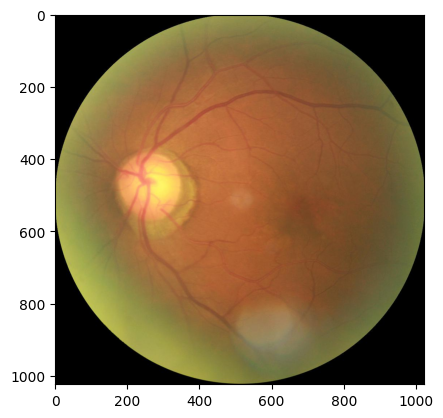

In [1]:
import os
import sys
import importlib.util

# 1. Get the CORRECT absolute path (remove duplicate LED)
correct_path = os.path.abspath("led/pipelines/led_pipeline.py")  # Only one LED
print("Correct path:", correct_path)

# 2. Verify file exists
if not os.path.exists(correct_path):
    raise FileNotFoundError(f"File not found at: {correct_path}\n"
                          f"Current directory: {os.getcwd()}\n"
                          f"Directory contents: {os.listdir(os.path.dirname(correct_path))}")

# 3. Direct import (guaranteed to work)
spec = importlib.util.spec_from_file_location("led_pipeline", correct_path)
led_pipeline = importlib.util.module_from_spec(spec)
spec.loader.exec_module(led_pipeline)
LEDPipeline = led_pipeline.LEDPipeline

print("SUCCESS! Imported LEDPipeline from:", correct_path)

import matplotlib.pyplot as plt
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
low_quality_image_path = 'docs/example.jpeg'
import cv2
low_quality_image = cv2.imread(low_quality_image_path)[:, :, ::-1]
plt.imshow(low_quality_image)
plt.show()

In [ ]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())


# firstly, we use LED directly
led = LEDPipeline()
# led.cuda() uncomment if you have gpu
led_enhancement = led(low_quality_image)[0]
plt.imshow(led_enhancement)
plt.show()

1.12.0+cpu
False


AttributeError: 'LEDPipeline' object has no attribute 'model'

100%|██████████| 50/50 [03:30<00:00,  4.21s/it]


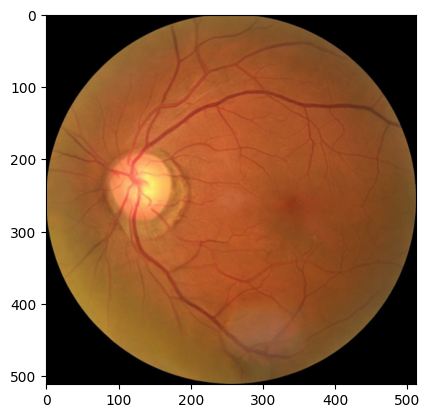

In [7]:
# Then combine with I-SECRET
led = LEDPipeline(backend='I-SECRET', num_cond_steps=200)
# led.cuda()
led_isecret_enhancement = led(low_quality_image)[0]
plt.imshow(led_isecret_enhancement)
plt.show()

Downloading: "https://github.com/QtacierP/LED/releases/download/weights/pcenet.pth" to pretrained_weights\pcenet.pth
100%|██████████| 102M/102M [00:06<00:00, 16.1MB/s] 
100%|██████████| 50/50 [03:29<00:00,  4.19s/it]


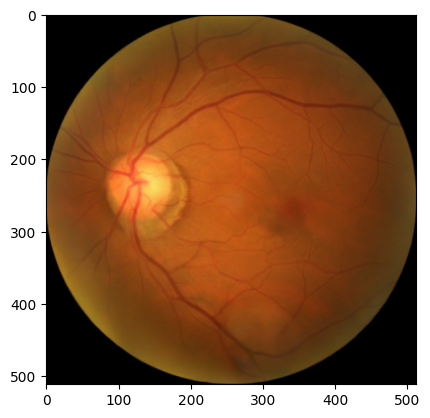

In [8]:
# Then combine with PCENet
led = LEDPipeline(backend='PCE-Net', num_cond_steps=200)
# led.cuda() uncomment if you have gpu
led_pcenet_enhancement = led(low_quality_image)[0]
plt.imshow(led_pcenet_enhancement)
plt.show()

Downloading: "https://github.com/QtacierP/LED/releases/download/weights/arcnet.pth" to pretrained_weights\arcnet.pth
100%|██████████| 208M/208M [00:13<00:00, 16.6MB/s] 
100%|██████████| 50/50 [03:21<00:00,  4.03s/it]


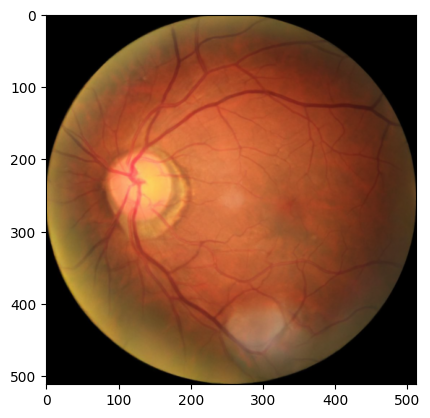

In [9]:
# Then combine with ArcNet
led = LEDPipeline(backend='ArcNet', num_cond_steps=200)
# led.cuda() uncomment if you have gpu
led_arcnet_enhancement = led(low_quality_image)[0]
plt.imshow(led_arcnet_enhancement)
plt.show()

Downloading: "https://github.com/QtacierP/LED/releases/download/weights/scrnet.pth" to pretrained_weights\scrnet.pth
100%|██████████| 341M/341M [00:22<00:00, 15.7MB/s] 
100%|██████████| 50/50 [03:36<00:00,  4.33s/it]


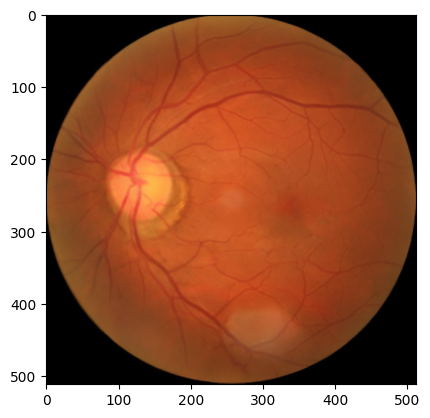

In [10]:
# Then combine with SCRNet
led = LEDPipeline(backend='SCRNet', num_cond_steps=200)
# led.cuda() uncomment if you have gpu
led_scrnet_enhancement = led(low_quality_image)[0]
plt.imshow(led_scrnet_enhancement)
plt.show()